# Prediction using Supervised Machine Learning - linear Regression (Scikit learn)

In [1]:
# first things first we import crucial packages
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### Data loading and inspection

In [2]:
#Data loading 
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
#data inspecton 
df # data scales well no need to do feature scalling

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.isna().any() # it can be seen that their is no null values hence no need to clean up or drop any rows

Hours     False
Scores    False
dtype: bool

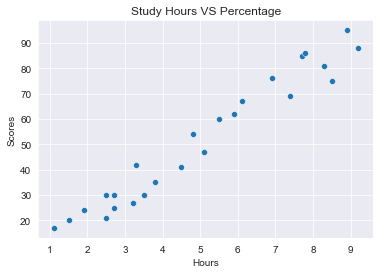

In [5]:
#data visualizaton
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="Hours", y="Scores").set(title='Study Hours VS Percentage');


#### The graph shows how the line of best fit should look like (positive correlation)

### Preparing the features and label

In [6]:
X = df.iloc[:, :-1].values  # taking all columns (only Hours in this case) but the last one as features
y = df.iloc[:, 1].values  # last column (Scores) 


In [7]:
# here we split the data into training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

### Model training

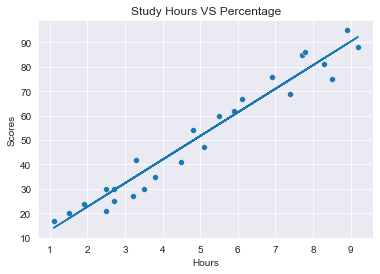

In [8]:
# instantiating
reg = LinearRegression()  
# trainin
reg.fit(X_train, y_train) 

# parameters extraction and plot regressor
slope = reg.coef_
y_inter = reg.intercept_
sns.scatterplot(data=df, x="Hours", y="Scores").set(title='Study Hours VS Percentage');
line = slope * X + y_inter
plt.plot(X, line);
plt.show()

#### line of best fit

In [9]:
# scare on train data and test data respectivly 
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.959107243251027
0.8962133817450807


### Prediciton making

In [10]:
# using the test set that was part of the whole data to predict values
y_pred = reg.predict(X_test)

In [11]:
print("Actual values:" , y_test)
print("Predicted values:" , y_pred)

Actual values: [47 69 85 30 60]
Predicted values: [52.65014502 74.87161463 77.77006719 37.19173137 56.51474843]


### Answering the task question


In [12]:
hours = np.array([[9.25]])
pred = reg.predict(hours)
print("A student studying {} hours/day will most likely recive {}".format(hours[0][0], pred[0]))


A student studying 9.25 hours/day will most likely recive 92.74540540342844


### Model metrics 

In [13]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Max Error:', 
      metrics.max_error(y_test, y_pred))

Mean Absolute Error: 5.885735080590592
Max Error: 7.229932813740092
